Fraud Detection Using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression, SGDClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

General information about the data:

In [2]:
credit_card=pd.read_csv("creditcard.csv")
print(credit_card.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
print(credit_card.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


Class needed to be categorical.

In [4]:
credit_card["Class"]=credit_card["Class"].astype("category")

Let' see if there are any null.

In [5]:
print(credit_card.isna().any().sum())

0


Let's see how many transactions are fraudulent.

In [6]:
credit_card["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Distribution of credit card frauds')

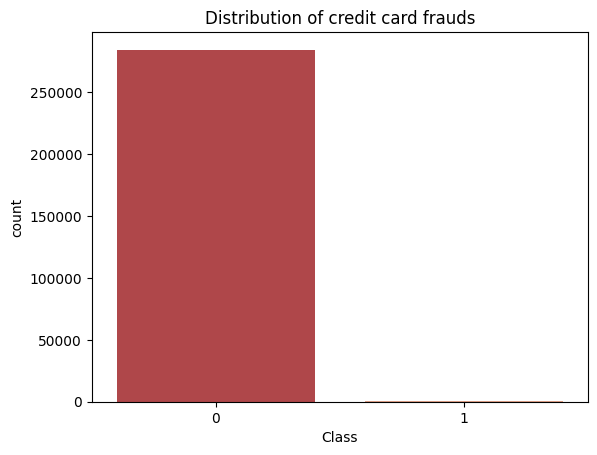

In [7]:
sns.set_palette("RdBu")
bar = sns.countplot(x=credit_card["Class"])
bar.set_title('Distribution of credit card frauds')

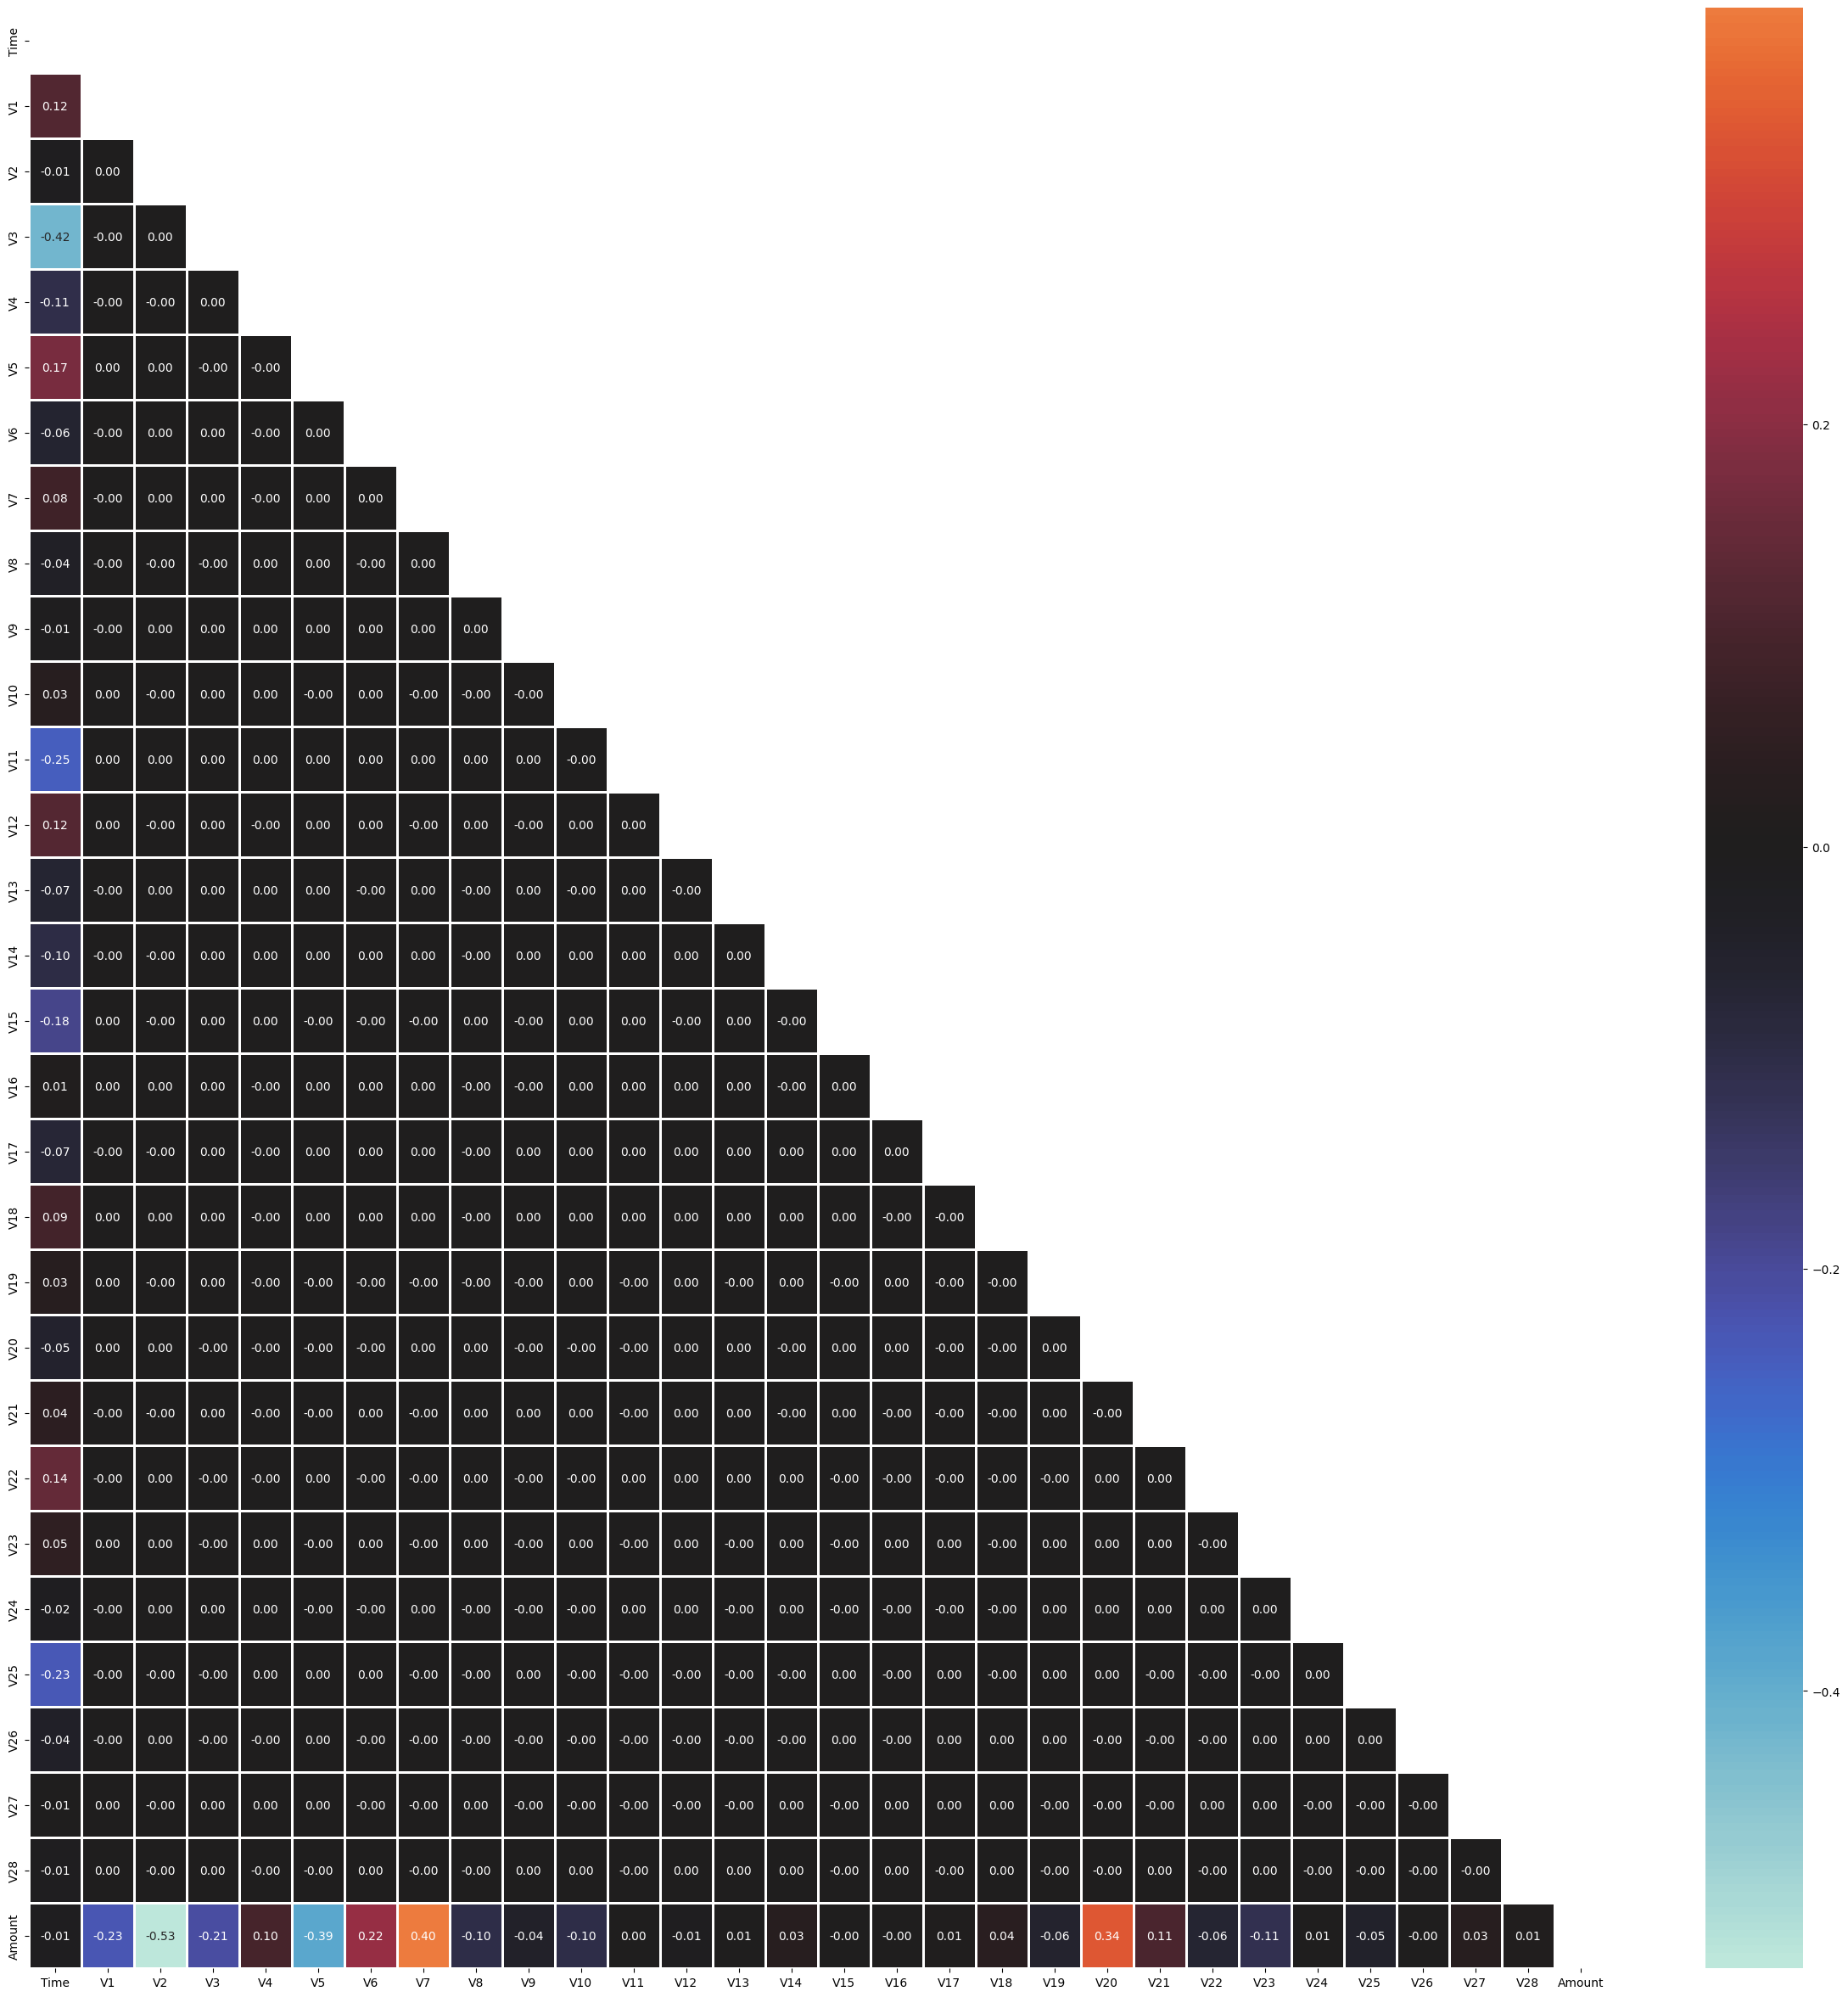

In [8]:
# Let's see correlation matrix
corr = credit_card.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (30,30))

ax = sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

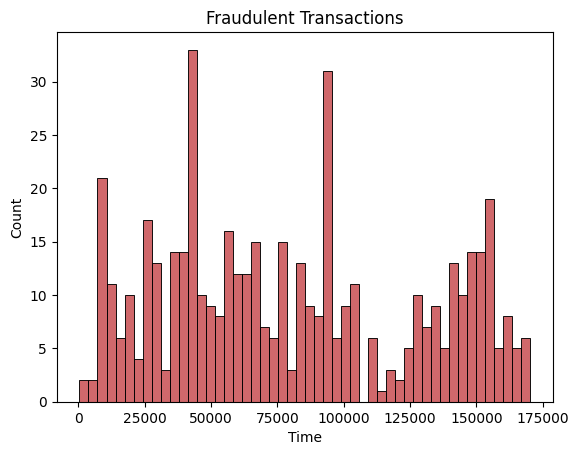

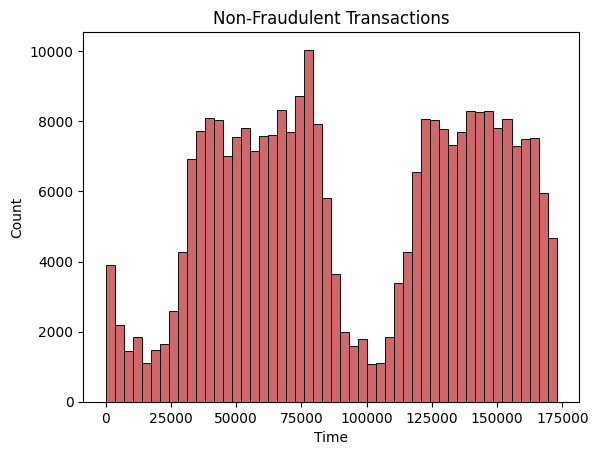

In [9]:
#sns.histplot(x="Time", data=credit_card, hue="Class")
g1 = sns.histplot(credit_card["Time"][credit_card.Class == 1], bins=50)
g1.set_title("Fraudulent Transactions")
plt.show()
g1 = sns.histplot(credit_card["Time"][credit_card.Class == 0], bins=50)
g1.set_title("Non-Fraudulent Transactions")
plt.show()

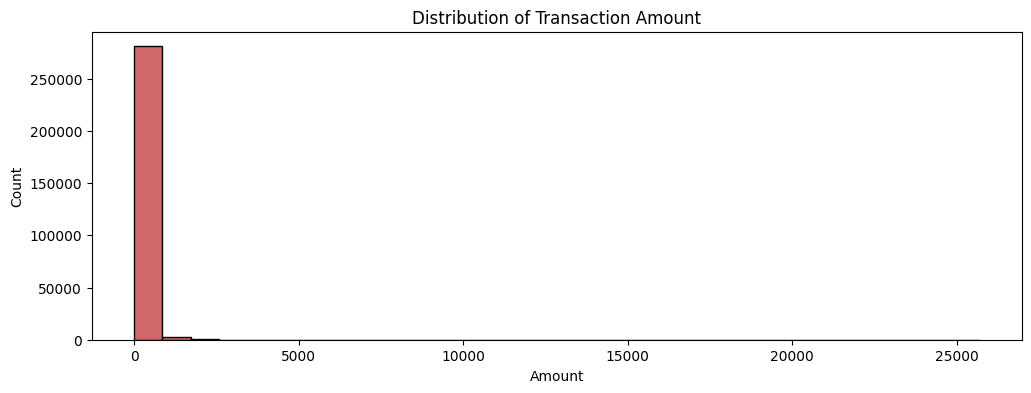

In [10]:
plt.figure(figsize = (12,4))
rel = sns.histplot(x=credit_card["Amount"],bins=30) 
rel.set_title('Distribution of Transaction Amount')
plt.show()

Check if any Nan exist.

In [11]:
def print_scores(models):
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        test_score = model.score(X_test_scaled, y_test)
        y_pred = model.predict(X_test_scaled)
        print(name)
        y_pred = np.round(y_pred)
        print("Confusion_matrix:\n",confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

In [12]:
X = credit_card.drop("Class", axis=1).values
y=credit_card["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=41, stratify=y)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
models = {"Logistic Regression": LogisticRegression(n_jobs=-1), "KNN": KNeighborsClassifier(n_jobs=-1),
          "Decision Tree": DecisionTreeClassifier(),"Support Vector Classifier":SVC(), "SGD": SGDClassifier(n_jobs=-1),
          "XGB": xgb.XGBRegressor(n_jobs=-1)}
print_scores(models)

Logistic Regression
Confusion_matrix:
 [[85285    10]
 [   63    85]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.57      0.70       148

    accuracy                           1.00     85443
   macro avg       0.95      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443

KNN
Confusion_matrix:
 [[85285    10]
 [   40   108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.73      0.81       148

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Decision Tree
Confusion_matrix:
 [[85246    49]
 [   35   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.70      0.76      0.73      

It seems KNN, Decision Tree and XGB works best. Let's see if we can get any better by tuning.

In [15]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) #We use stratified becuse of imbalanced dataset. 

In [16]:
# Logistic Regression 
log_reg_params = {"solver" : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=10000,n_jobs=-1),
                                  log_reg_params, cv=kf, n_iter=3, n_jobs=-1, scoring="recall")
grid_log_reg.fit(X_train_scaled, y_train)
log_reg = grid_log_reg.best_estimator_

In [17]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params, cv=kf, n_iter=4, n_jobs=-1)
grid_tree.fit(X_train_scaled, y_train)
tree_clf = grid_tree.best_estimator_

In [18]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = RandomizedSearchCV(KNeighborsClassifier(n_jobs=-1), knears_params, cv=kf, n_iter=4)
grid_knears.fit(X_train_scaled, y_train)
knears_neighbors = grid_knears.best_estimator_

In [19]:
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}
grid_xgb = RandomizedSearchCV(xgb.XGBRegressor(objective="binary:logistic",n_jobs=-1), params, cv=kf, n_iter=4,scoring="recall")
grid_xgb.fit(X_train_scaled, y_train)
xgb = grid_xgb.best_estimator_

In [20]:
models_with_params={ "Decision Tree": tree_clf, "KNN": knears_neighbors,"Logistic Regression": log_reg, "XGB": xgb}
print_scores(models_with_params)

Decision Tree
Confusion_matrix:
 [[85278    17]
 [   48   100]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.68      0.75       148

    accuracy                           1.00     85443
   macro avg       0.93      0.84      0.88     85443
weighted avg       1.00      1.00      1.00     85443

KNN
Confusion_matrix:
 [[85288     7]
 [   38   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.74      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Logistic Regression
Confusion_matrix:
 [[85285    10]
 [   61    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.59      0.71      

Tuning didn't much a lot of diffecerence but XGB and KNN are stil good. Other techniques will be implemented soon.